In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from ema_workbench.analysis import pairs_plotting
from ema_workbench.analysis import feature_scoring
from tqdm import tqdm

from sklearn.preprocessing import StandardScaler, LabelEncoder

import warnings
from sklearn import tree
from pprint import pprint 
import graphviz
import sklearn
import dtreeviz

import os
import sys
sys.path.insert(0, '..')

from archspace import CQRS, ArchSpace
from archspace import show_pairplot, show_feature_scores, show_outcome_distributions, show_tradeoff_distribution
from archspace import show_quality_attribute_space2D, show_configuration_space2D

In [2]:
# from os import listdir
# from os.path import isfile, join

# mypath = "./separated_HW/additional_results"
# # mypath = "./separated_SW/additional_results"
# onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

# list_dfs = []
# for f in onlyfiles:
#     df = pd.read_csv(mypath + "/" + f)
#     print(f, df.shape)
#     list_dfs.append(df) 
# df = pd.concat(list_dfs, axis=0, ignore_index=True)
# df.to_csv("./separated_HW/sep_phy_new.csv", index=False)
# # df.to_csv("./separated_SW/sep_mod_new.csv", index=False)
# df

In [3]:
# Load the dataset for the pattern
my_space = CQRS()
my_space.create_model('cqrs')

# experiments_df, outcomes_df = my_space.load_results('./separated_HW/sep_phy.csv', kind='hw')
# experiments_df, outcomes_df = my_space.load_results('./separated_SW/sep_mod.csv', kind='sw')
experiments_df, outcomes_df = my_space.load_results('./separated_HW/sep_phy_new.csv', kind='hw')
experiments_df, outcomes_df = my_space.load_results('./separated_SW/sep_mod_new.csv', kind='sw')

print(len(my_space.get_configurations()), "configurations")

(324, 33)
(324, 14)
initial size: (324, 12)
(324, 32)
(324, 13)
appended size: (324, 12)
final size: (648, 12)
2 configurations


In [4]:
experiments_df

,scenario,N_read,N_write,r_Z_read,r_Z_write,C_DB_read,r_DB_read,C_DB_write,r_DB_write,C_DB,policy,model
0,0,90,10,0.1,0.002439,1,0.142857,1,0.027778,2,hw,cqrs
1,1,90,10,0.1,0.002632,1,0.142857,1,0.027778,2,hw,cqrs
2,2,90,10,0.1,0.002273,1,0.142857,1,0.027778,2,hw,cqrs
3,3,90,10,0.1,0.002128,1,0.142857,1,0.027778,2,hw,cqrs
4,4,90,10,0.1,0.002381,1,0.142857,1,0.027778,2,hw,cqrs
...,...,...,...,...,...,...,...,...,...,...,...,...
643,319,90,10,0.1,0.001064,1,0.333333,1,0.027778,1,sw,cqrs
644,320,90,10,0.1,0.001031,1,0.333333,1,0.027778,1,sw,cqrs
645,321,90,10,0.1,0.001099,1,0.333333,1,0.027778,1,sw,cqrs
646,322,90,10,0.1,0.001000,1,0.333333,1,0.027778,1,sw,cqrs


In [5]:
experiments_df.describe()

,scenario,N_read,N_write,r_Z_read,r_Z_write,C_DB_read,r_DB_read,C_DB_write,r_DB_write,C_DB
count,648.00000,648.0,648.0,6.480000e+02,648.000000,648.0,648.000000,648.0,648.000000,648.000000
mean,161.50000,90.0,10.0,1.000000e-01,0.002024,1.0,0.238095,1.0,0.025253,1.500000
std,93.60255,0.0,0.0,1.388851e-17,0.001003,0.0,0.095312,0.0,0.002527,0.500386
min,0.00000,90.0,10.0,1.000000e-01,0.001000,1.0,0.142857,1.0,0.022727,1.000000
25%,80.75000,90.0,10.0,1.000000e-01,0.001250,1.0,0.142857,1.0,0.022727,1.000000
50%,161.50000,90.0,10.0,1.000000e-01,0.001667,1.0,0.238095,1.0,0.025253,1.500000
75%,242.25000,90.0,10.0,1.000000e-01,0.002500,1.0,0.333333,1.0,0.027778,2.000000
max,323.00000,90.0,10.0,1.000000e-01,0.005000,1.0,0.333333,1.0,0.027778,2.000000


In [6]:
experiments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   scenario    648 non-null    int64  
 1   N_read      648 non-null    int64  
 2   N_write     648 non-null    int64  
 3   r_Z_read    648 non-null    float64
 4   r_Z_write   648 non-null    float64
 5   C_DB_read   648 non-null    int64  
 6   r_DB_read   648 non-null    float64
 7   C_DB_write  648 non-null    int64  
 8   r_DB_write  648 non-null    float64
 9   C_DB        648 non-null    int64  
 10  policy      648 non-null    object 
 11  model       648 non-null    object 
dtypes: float64(4), int64(6), object(2)
memory usage: 60.9+ KB


In [7]:
outcomes_df

,response_time,utilization
0,623.357807,0.788651
1,657.074243,0.775553
2,610.452155,0.805374
3,598.339975,0.794788
4,606.345257,0.808493
...,...,...
643,400.166379,0.500181
644,395.435435,0.500419
645,395.436904,0.499926
646,388.136385,0.502448


In [8]:
outcomes_df.describe()

,response_time,utilization
count,648.000000,648.000000
mean,659.784585,0.601964
std,355.493788,0.110694
min,283.228874,0.493556
25%,429.982207,0.500460
50%,604.379940,0.510975
75%,871.257721,0.712609
max,3604.255148,0.808493


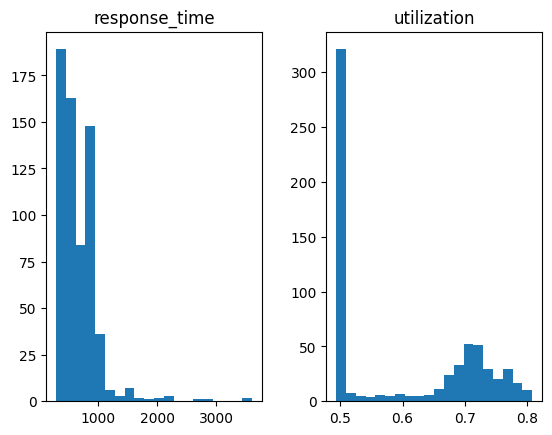

In [9]:
# outcomes
outcomes_df.hist(bins=20, grid=False)
plt.show()

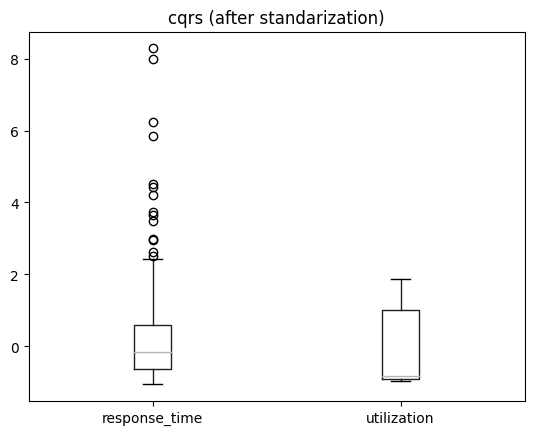

In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(outcomes_df)
scaled_df = pd.DataFrame(scaled_data, columns=outcomes_df.columns)
scaled_df.boxplot(grid=False)
plt.title('cqrs (after standarization)')
plt.show()

# TODO: Probably I should remove outliers for response time

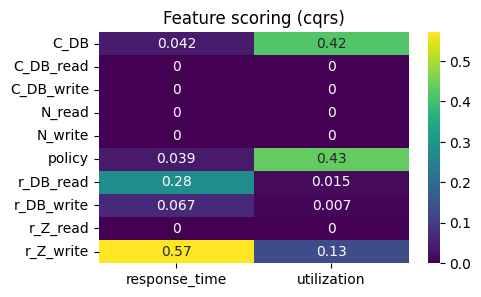

,response_time,utilization
0,,
C_DB,0.042074,0.415183
C_DB_read,0.000000,0.000000
C_DB_write,0.000000,0.000000
N_read,0.000000,0.000000
N_write,0.000000,0.000000
policy,0.039335,0.433391
r_DB_read,0.280262,0.014790
r_DB_write,0.066895,0.007016
r_Z_read,0.000000,0.000000


In [11]:
policy_size = (5,3)
filter_params = None # ['N_read', 'N_write', 'r_Z_read', 'r_Z_write'] # Screening most important parameters
fs = show_feature_scores(my_space, title='Feature scoring (cqrs)', size=policy_size, parameters=filter_params) #, filename=None)  
fs

In [12]:
my_policies = my_space.get_configurations()
my_policies

['hw', 'sw']

In [13]:
outcomes_df.describe()

,response_time,utilization
count,648.000000,648.000000
mean,659.784585,0.601964
std,355.493788,0.110694
min,283.228874,0.493556
25%,429.982207,0.500460
50%,604.379940,0.510975
75%,871.257721,0.712609
max,3604.255148,0.808493


Absolute ranges: [(283.0, 3605.0), (0.0, 1.0)]
response_time [282.9, 1390.2999999999997, 2497.7, 3605.1]
utilization [-0.1, 0.30000000000000004, 0.7000000000000002, 1.1]


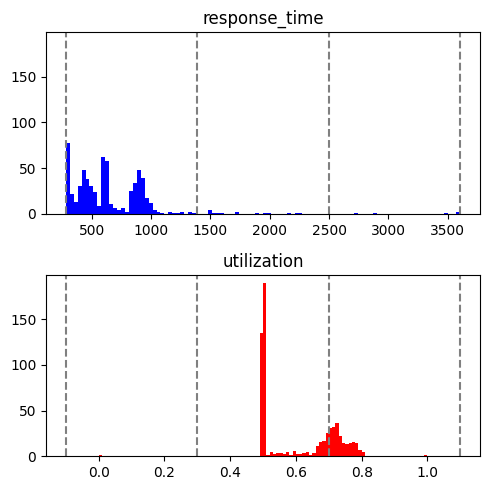

{'response_time': [282.9, 1390.2999999999997, 2497.7, 3605.1],
 'utilization': [-0.1, 0.30000000000000004, 0.7000000000000002, 1.1]}

In [14]:
# Setting the ranges for the labels of quality attributes
MIN_RESPONSE_TIME, MAX_RESPONSE_TIME = (283.0, 3605.0)
# MIN_READ_RESPONSE_TIME, MAX_READ_RESPONSE_TIME = (450, 5260)
# MIN_WRITE_RESPONSE_TIME, MAX_WRITE_RESPONSE_TIME = (408, 1619)
# MIN_UTILIZATION, MAX_UTILIZATION = (0.98, 1.55)
MIN_UTILIZATION, MAX_UTILIZATION = (0.0, 1.0)

# MIN_MAX_RANGES = [(MIN_RESPONSE_TIME, MAX_RESPONSE_TIME), (MIN_READ_RESPONSE_TIME, MAX_READ_RESPONSE_TIME), 
#                   (MIN_WRITE_RESPONSE_TIME, MAX_WRITE_RESPONSE_TIME), (MIN_UTILIZATION, MAX_UTILIZATION)]
MIN_MAX_RANGES = [(MIN_RESPONSE_TIME, MAX_RESPONSE_TIME), (MIN_UTILIZATION, MAX_UTILIZATION)]
print('Absolute ranges:', MIN_MAX_RANGES)

show_outcome_distributions(my_space, mins_maxs=MIN_MAX_RANGES, size=(5,5))

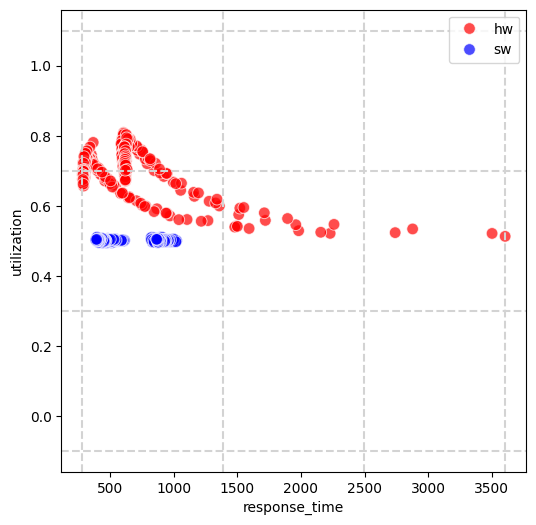

In [15]:
df = outcomes_df.copy()
df['decision'] = experiments_df['policy']
color_key = {'hw': 'red','sw': 'blue'}
show_quality_attribute_space2D(df, MIN_MAX_RANGES, alpha=0.7,color_key=color_key)

In [16]:
# Count feasible tradeoffs in the dataset
_ = my_space.discretize_outcomes(mins_maxs=MIN_MAX_RANGES)
print("Experiments:", experiments_df.shape)
my_space.available_tradeoffs_

Experiments: (648, 12)


Counter({'fast,average': 425,
         'fast,high': 204,
         'average,average': 15,
         'slow,average': 4})

In [17]:
# Split dataset for ML analysis (train/test sets). Also outliers removal
X_train, X_test, y_train, y_test = my_space.split_dataset(test_size=0.4, remove_outliers=3)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(648, 14) 648
Removing outliers ... 3
Instances to remove (outliers): {321, 258, 323, 102, 142, 278, 312, 89, 125, 286}
Instances to remove (not enough tradeoffs): {321, 258, 323, 102, 142, 278, 312, 89, 125, 286}
{'fast,high', 'average,average', 'fast,average'}
(638, 14) 638
(382, 14) (382, 2) (256, 14) (256, 2)


In [18]:
X_train[['response_time', 'utilization']].describe()

,response_time,utilization
count,382.000000,382.000000
mean,619.203675,0.604065
std,255.032040,0.112178
min,283.228874,0.493556
25%,422.579163,0.500355
50%,597.429700,0.508303
75%,853.423016,0.714767
max,1720.512021,0.808493


In [19]:
X_test[['response_time', 'utilization']].describe()

,response_time,utilization
count,256.000000,256.000000
mean,647.654245,0.601580
std,266.424570,0.109900
min,286.415311,0.493803
25%,440.389459,0.500541
50%,613.060008,0.507448
75%,877.602408,0.711756
max,1712.170788,0.794788


Absolute ranges: [(283.0, 1725.0), (0.49, 1.0)]
response_time [282.9, 763.6333333333332, 1244.3666666666666, 1725.1]


utilization [0.39, 0.6266666666666667, 0.8633333333333334, 1.1]


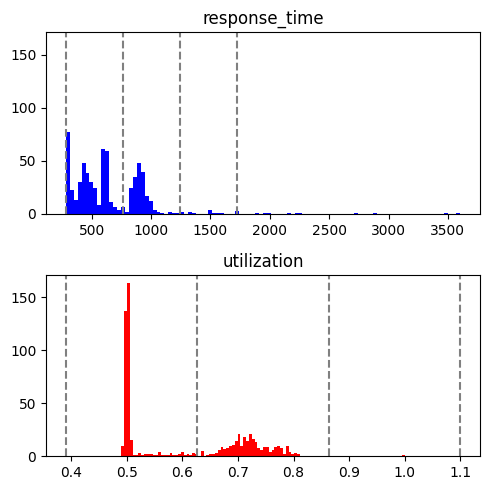

{'response_time': [282.9, 763.6333333333332, 1244.3666666666666, 1725.1],
 'utilization': [0.39, 0.6266666666666667, 0.8633333333333334, 1.1]}

In [20]:
# Setting the ranges for the labels of quality attributes
MIN_RESPONSE_TIME, MAX_RESPONSE_TIME = (283.0, 1725.0)
MIN_UTILIZATION, MAX_UTILIZATION = (0.49, 1.0)

MIN_MAX_RANGES = [(MIN_RESPONSE_TIME, MAX_RESPONSE_TIME), (MIN_UTILIZATION, MAX_UTILIZATION)]
print('Absolute ranges:', MIN_MAX_RANGES)

show_outcome_distributions(my_space, mins_maxs=MIN_MAX_RANGES, size=(5,5))

In [21]:
df_concat = pd.concat([X_train, X_test], axis=0)
df_concat.reset_index(drop=True, inplace=True)
df_concat[['response_time', 'utilization']].describe()

,response_time,utilization
count,638.000000,638.000000
mean,630.619578,0.603068
std,259.831015,0.111190
min,283.228874,0.493556
25%,428.982143,0.500425
50%,601.916752,0.508056
75%,867.202293,0.713012
max,1720.512021,0.808493


Experiments: (648, 12)
Counter({'fast,average': 265, 'average,low': 173, 'fast,low': 168, 'average,average': 18, 'slow,low': 14})


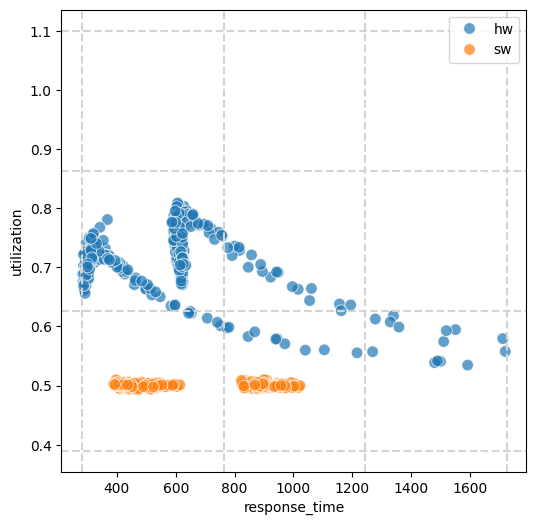

In [22]:
my_space.import_dataset(df_concat, df_concat[['response_time', 'utilization']])
 
_ = my_space.discretize_outcomes(mins_maxs=MIN_MAX_RANGES)
print("Experiments:", experiments_df.shape)
print(my_space.available_tradeoffs_)

df = df_concat[['response_time', 'utilization','policy']].copy()
show_quality_attribute_space2D(df, MIN_MAX_RANGES, alpha=0.7)

Computing robustness for all configurations (whole space)...


100%|██████████| 2/2 [00:00<00:00,  6.04it/s]


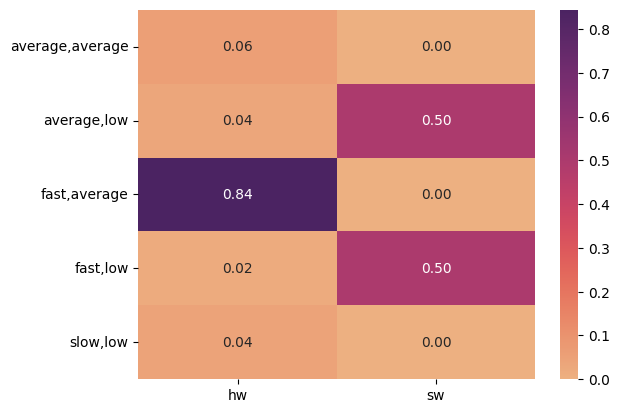

,hw,sw
"average,average",0.057325,0.0
"average,low",0.035032,0.5
"fast,average",0.843949,0.0
"fast,low",0.019108,0.5
"slow,low",0.044586,0.0


In [23]:
# def compute_robustness_matrix(my_space):
#     main_dict = dict()
#     for exp in tqdm(my_space.get_configurations()):
#         print(exp)
#         main_dict[str(exp)] = dict()
#         for qa in my_space.available_tradeoffs_.keys():
#             main_dict[str(exp)][qa], _ = my_space.compute_robustness(exp, qa)
#     df = pd.DataFrame.from_dict(main_dict, orient='columns').sort_index()
#     return df

print("Computing robustness for all configurations (whole space)...")
df = my_space.compute_robustness_matrix()
# df.to_csv('./cqrs_robustness_matrix.csv')

sns.heatmap(df, annot=True, fmt=".2f", cmap='flare')
plt.show()
df

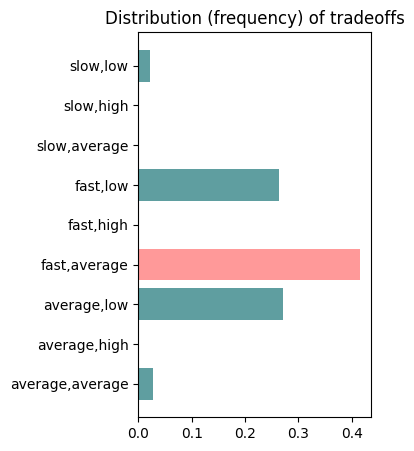

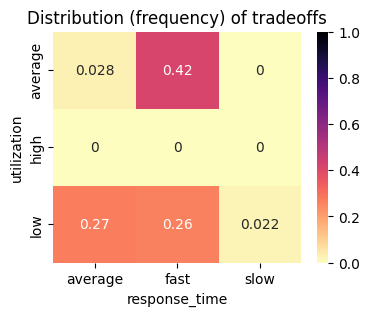

In [24]:
show_tradeoff_distribution(my_space, size=(3,5))
show_tradeoff_distribution(my_space, size=(4,3), in2D=True)

In [25]:
label_values_df = my_space.describe_labels(n_bins=3)
label_values_df

,objective,min,max,label
0,response_time,283.128874,762.289923,fast
1,response_time,762.289923,1241.450972,average
2,response_time,1241.450972,1720.612021,slow
3,utilization,0.393556,0.565202,low
4,utilization,0.565202,0.736847,average
5,utilization,0.736847,0.908493,high


In [26]:
my_space.import_dataset(X_train, y_train)
 
_ = my_space.discretize_outcomes(mins_maxs=MIN_MAX_RANGES)
print("Experiments:", experiments_df.shape)
print(my_space.available_tradeoffs_)

#df = X_train[['response_time', 'utilization','policy']].copy()
#show_quality_attribute_space2D(df, MIN_MAX_RANGES, alpha=0.7)

Experiments: (648, 12)
Counter({'fast,average': 160, 'fast,low': 106, 'average,low': 97, 'average,average': 12, 'slow,low': 7})


Experiments: (648, 12)
  Computing robustness for all configurations (train set)...
Counter({'fast,average': 160, 'fast,low': 106, 'average,low': 97, 'average,average': 12, 'slow,low': 7})


100%|██████████| 2/2 [00:00<00:00, 17.85it/s]


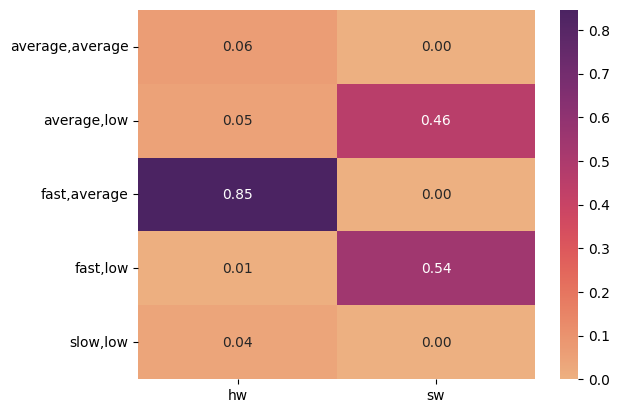

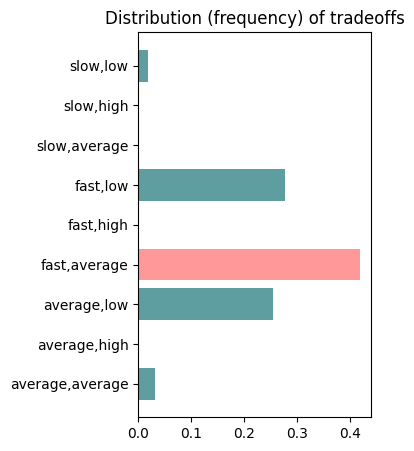

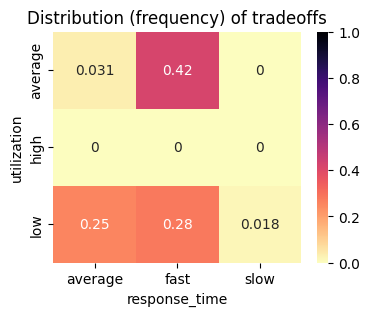

,hw,sw
"average,average",0.063492,0.000000
"average,low",0.047619,0.455959
"fast,average",0.846561,0.000000
"fast,low",0.005291,0.544041
"slow,low",0.037037,0.000000


In [27]:
# Work first with the train set

my_space.import_dataset(X_train, y_train)
 
_ = my_space.discretize_outcomes(mins_maxs=MIN_MAX_RANGES)
print("Experiments:", experiments_df.shape)
#df = X_train[['response_time', 'utilization','policy']].copy()
#show_quality_attribute_space2D(df, MIN_MAX_RANGES, alpha=0.7)

print("  Computing robustness for all configurations (train set)...")
print(my_space.available_tradeoffs_)

df = my_space.compute_robustness_matrix()
sns.heatmap(df, annot=True, fmt=".2f", cmap='flare')

show_tradeoff_distribution(my_space, size=(3,5))
show_tradeoff_distribution(my_space, size=(4,3), in2D=True)

df

Experiments: (648, 12)
  Computing robustness for all configurations (test set)...
Counter({'fast,average': 105, 'average,low': 76, 'fast,low': 62, 'slow,low': 7, 'average,average': 6})


100%|██████████| 2/2 [00:00<00:00, 19.11it/s]


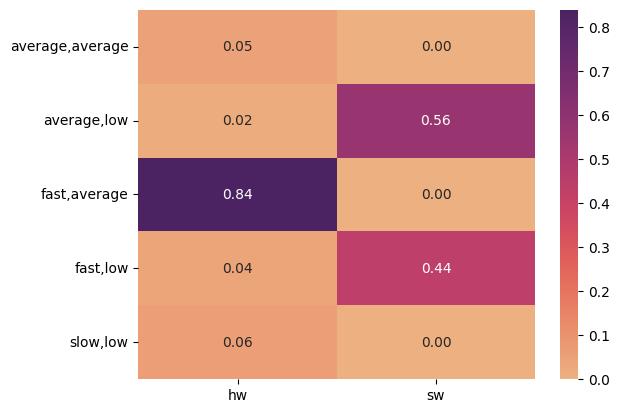

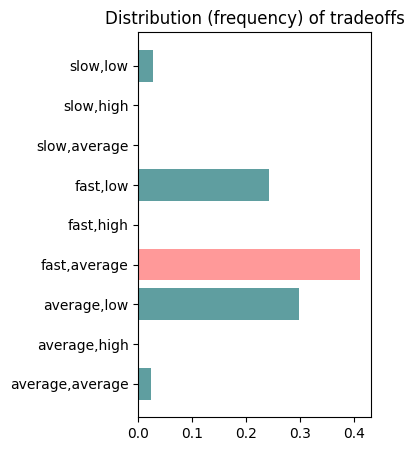

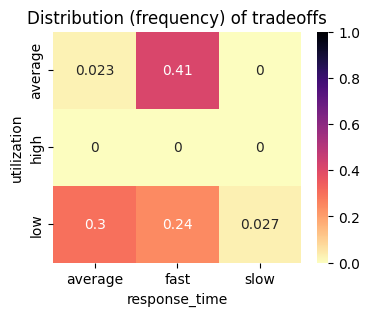

,hw,sw
"average,average",0.048,0.000000
"average,low",0.016,0.564885
"fast,average",0.840,0.000000
"fast,low",0.040,0.435115
"slow,low",0.056,0.000000


In [ ]:
# Work first with the test set

my_space.import_dataset(X_test, y_test)
# my_space.import_dataset(X_train, y_train)
_ = my_space.discretize_outcomes(mins_maxs=MIN_MAX_RANGES)
print("Experiments:", experiments_df.shape)
#df = X_train[['response_time', 'utilization','policy']].copy()
#show_quality_attribute_space2D(df, MIN_MAX_RANGES, alpha=0.7)

print("  Computing robustness for all configurations (test set)...")
print(my_space.available_tradeoffs_)

df = my_space.compute_robustness_matrix()
sns.heatmap(df, annot=True, fmt=".2f", cmap='flare')

show_tradeoff_distribution(my_space, size=(3,5))
show_tradeoff_distribution(my_space, size=(4,3), in2D=True)

df

In [28]:
# Run PRIM for each tradeoff using the train set, and then evaluate the robustness achieved on the test set
warnings.filterwarnings('ignore')
# my_space.import_dataset(X_train, y_train)

kp = ['N_read', 'N_write', 'r_Z_read', 'r_Z_write']
my_policies = my_space.get_configurations()
qa_labels = list(my_space.available_tradeoffs_.keys())
qa_labels.sort()
for qa_label in qa_labels:
    # Also loop over the different policies (configurations)?
    # for policy in my_policies:
        policy = None
        my_space.import_dataset(X_train, y_train)
        _ = my_space.discretize_outcomes(mins_maxs=MIN_MAX_RANGES)
        n = my_space.available_tradeoffs_[qa_label]
        
        if n > 0:
            print()
            print("Checking (with PRIM) ----")
            property_to_check = my_space.get_property_box(qa_label)
            print("  Property: ", qa_label, property_to_check)
            print("  Policy: ", policy)

            try:
                box1, prange, prim_model = my_space.run_prim(property_to_check, policy=policy,
                                                         threshold=0.8, method='rhodium', # 'emaw' 'rhodium'
                                                         key_parameters=kp, verbose=False)
                # print(box1)
                print("  New ranges:",  prange)
            except Exception:
                print("EXCEPTION triggered!") 
                pass

            my_space.import_dataset(X_test, y_test)
            _ = my_space.discretize_outcomes(mins_maxs=MIN_MAX_RANGES)
            my_space.adjust_parameters(prange)
            _ = my_space.discretize_outcomes(mins_maxs=MIN_MAX_RANGES)
            print("  Experiments:", my_space.experiments_df_.shape)
            print(my_space.compute_robustness(policy, qa_label))

            print("  Computing robustness for all configurations (test set) ...")
            df = my_space.compute_robustness_matrix()
            print(df)
            # plt.show()

my_space.import_dataset(X_train, y_train)
_ = my_space.discretize_outcomes(mins_maxs=MIN_MAX_RANGES)


Checking (with PRIM) ----
  Property:  average,average {'response_time': (763.6333333333332, 1244.3666666666666), 'utilization': (0.6266666666666667, 0.8633333333333334)}
  Policy:  None
  New ranges: {'r_Z_write': {'min': 0.0024099883855981, 'max': 0.0040833333333333}}
  Experiments: (59, 12)
(0.0, 'average,average')
  Computing robustness for all configurations (test set) ...


100%|██████████| 2/2 [00:00<00:00, 36.25it/s]


                       hw        sw
average,average  0.200000  0.000000
average,low      0.033333  0.482759
fast,average     0.433333  0.000000
fast,low         0.166667  0.517241
slow,low         0.166667  0.000000

Checking (with PRIM) ----
  Property:  average,low {'response_time': (763.6333333333332, 1244.3666666666666), 'utilization': (0.39, 0.6266666666666667)}
  Policy:  None
  New ranges: {'r_Z_write': {'min': 0.00110500610500605, 'max': 0.005}}
  Experiments: (216, 12)
(0.0, 'average,low')
  Computing robustness for all configurations (test set) ...


100%|██████████| 2/2 [00:00<00:00, 30.10it/s]


                       hw        sw
average,average  0.057692  0.000000
average,low      0.019231  0.544643
fast,average     0.807692  0.000000
fast,low         0.048077  0.455357
slow,low         0.067308  0.000000

Checking (with PRIM) ----
  Property:  fast,average {'response_time': (282.9, 763.6333333333332), 'utilization': (0.6266666666666667, 0.8633333333333334)}
  Policy:  None
  New ranges: {'r_Z_write': {'min': 0.001, 'max': 0.0021980676328502}}
  Experiments: (178, 12)
(0.0, 'fast,average')
  Computing robustness for all configurations (test set) ...


100%|██████████| 2/2 [00:00<00:00, 46.45it/s]


               hw        sw
average,low   0.0  0.586957
fast,average  1.0  0.000000
fast,low      0.0  0.413043

Checking (with PRIM) ----
  Property:  fast,low {'response_time': (282.9, 763.6333333333332), 'utilization': (0.39, 0.6266666666666667)}
  Policy:  None
  New ranges: {}
  Experiments: (256, 12)
(0.0, 'fast,low')
  Computing robustness for all configurations (test set) ...


100%|██████████| 2/2 [00:00<00:00, 40.88it/s]


                    hw        sw
average,average  0.048  0.000000
average,low      0.016  0.564885
fast,average     0.840  0.000000
fast,low         0.040  0.435115
slow,low         0.056  0.000000

Checking (with PRIM) ----
  Property:  slow,low {'response_time': (1244.3666666666666, 1725.1), 'utilization': (0.39, 0.6266666666666667)}
  Policy:  None
  New ranges: {'r_Z_write': {'min': 0.0035098522167487, 'max': 0.005}}
  Experiments: (23, 12)
(0.0, 'slow,low')
  Computing robustness for all configurations (test set) ...


100%|██████████| 2/2 [00:00<00:00, 49.91it/s]

                       hw        sw
average,average  0.111111  0.000000
average,low      0.111111  0.571429
fast,low         0.222222  0.428571
slow,low         0.555556  0.000000


In [29]:
policy = None
my_space.import_dataset(X_train, y_train)
_ = my_space.discretize_outcomes(mins_maxs=MIN_MAX_RANGES)
# n = my_space.available_tradeoffs_[qa_label]

kp = ['N_read', 'N_write', 'r_Z_read', 'r_Z_write']
print("Checking (with CART) ---- all properties")
print("  Policy: ", policy)

triple_rules, ranges, cart_model = my_space.run_cart(key_parameters=kp, prune_tree=True)
clf = cart_model.clf
print("nodes:", clf.tree_.node_count, "leaves:", clf.get_n_leaves())
print("  New ranges:")
for r in ranges.keys():
    print("\t", r, ranges[r])
print("Rules:")
for t in triple_rules:
    print(t)

print()
print("Testing ---- ")
qa_labels = list(my_space.available_tradeoffs_.keys())
qa_labels = [qa for qa in qa_labels if qa in ranges.keys()] # Not all qa labels might be covered by the CART model
qa_labels.sort()
for qa_label in qa_labels:
    print()
    property_to_check = my_space.get_property_box(qa_label)
    prange = ranges[qa_label]
    print("  Property: ", qa_label, property_to_check)
    print("  Range:",  prange)
    
    my_space.import_dataset(X_test, y_test)
    my_space.adjust_parameters(prange)
    n = my_space.available_tradeoffs_[qa_label]
    if n > 0:
        _ = my_space.discretize_outcomes(mins_maxs=MIN_MAX_RANGES)
        print("  Experiments:", my_space.experiments_df_.shape)
        if my_space.experiments_df_.shape[0] > 0:
            print(my_space.compute_robustness(policy, qa_label))

        print("  Computing robustness for all configurations (test set) ...")
        df = my_space.compute_robustness_matrix()
        print(df)
        # plt.show()
    else:
        print("  No experiments in this range")

my_space.import_dataset(X_train, y_train)
_ = my_space.discretize_outcomes(mins_maxs=MIN_MAX_RANGES)

Checking (with CART) ---- all properties
  Policy:  None
(382, 4) Index(['N_read', 'N_write', 'r_Z_read', 'r_Z_write'], dtype='object')
Running CART ... 0.005235602094240838
nodes: 155 leaves: 129
  New ranges:
	 fast,average {'r_Z_write': {'min': 0.001000001, 'max': 0.002}}
	 average,low {'r_Z_write': {'min': 0.003000001, 'max': 0.004}}
	 slow,low {'r_Z_write': {'min': 0.0050000010000000004, 'max': inf}}
Rules:
[('<=', 'r_Z_write', 0.003), ('<=', 'r_Z_write', 0.002), ('>', 'r_Z_write', 0.001), ('>', 'r_Z_write', 0.001), ('>', 'r_Z_write', 0.002), ('>', 'r_Z_write', 0.002), ('>', 'r_Z_write', 0.002), ('class', 'fast,average', 0.5)]
[('<=', 'r_Z_write', 0.003), ('<=', 'r_Z_write', 0.002), ('>', 'r_Z_write', 0.001), ('>', 'r_Z_write', 0.001), ('>', 'r_Z_write', 0.002), ('<=', 'r_Z_write', 0.002), ('class', 'fast,average', 0.54)]
[('<=', 'r_Z_write', 0.003), ('<=', 'r_Z_write', 0.002), ('>', 'r_Z_write', 0.001), ('<=', 'r_Z_write', 0.001), ('<=', 'r_Z_write', 0.001), ('>', 'r_Z_write', 0.

100%|██████████| 2/2 [00:00<00:00, 51.67it/s]

               hw        sw
average,low   0.0  0.552941
fast,average  1.0  0.000000
fast,low      0.0  0.447059

  Property:  slow,low {'response_time': (1244.3666666666666, 1725.1), 'utilization': (0.39, 0.6266666666666667)}
  Range: {'r_Z_write': {'min': 0.0050000010000000004, 'max': inf}}
  No experiments in this range


In [30]:
# cart_model, string_rules, triple_rules  = my_space.run_cart_raw(key_parameters=kp, prune_tree=True)
# clf = cart_model.clf
# class_names =  my_space._get_cluster_labels()
# dot_data = tree.export_graphviz(clf, out_file=None, feature_names=kp, class_names=class_names,
#                                 filled=True, rounded=True, special_characters=True)
# graph = graphviz.Source(dot_data)

# print(tree.export_text(cart_model.clf))
# # pprint(tree.export_text(prunedTree))

# graph